# Define some URLS and execute some imports
ImageNet has a small API for mapping "WordNet IDs" (wnid) to various data points. It *doesnt* however have a search functionality

In [1]:
import requests
import random

API = {
    'allsynsets': "http://image-net.org/api/text/imagenet.synset.obtain_synset_list",
    'wordsfor': "http://image-net.org/api/text/wordnet.synset.getwords?wnid={}",
    'urlsfor': "http://image-net.org/api/text/imagenet.synset.geturls?wnid={}",
    'hyponymfor': "http://image-net.org/api/text/wordnet.structure.hyponym?wnid={}",
}

## Get all tracked wnids
Print one to confirm

In [2]:
# Fetch the list of synset IDs, content is a binary string - decode it before tokenizing on \n
synsets = requests.get(API['allsynsets']).content.decode().splitlines()

# Print one
random.choice(synsets)

'n12095020'

## Translate a wnid to its descriptors
Print to confirm

In [10]:
# Fetch the words for a given synset ID 
r = requests.get(API['wordsfor'].format(
    random.choice(synsets))
)

# Decode and split the result
words = r.content.decode().splitlines()
del r
words

['clinic']

## Get the image urls for a synset
Print the first few to confirm

In [4]:
r = requests.get(API['urlsfor'].format(random.choice(synsets)))
urls = r.content.decode().splitlines()
del r
urls[:5] + ["..."] # First 5 urls for 

['http://lh3.google.com/_obbjVUGWu-0/RnLVJZT8XpI/AAAAAAAAAfw/w2VvvjIUhqo/s800/60+-+robinsons+mouse+opossum.jpg',
 'http://www.aaanimalcontrol.com/Professional-Trapper/images/wildlife-opossum.jpg',
 'http://www.temkit.com/images/possum.jpg',
 'http://farm1.static.flickr.com/9/68740507_0fb06a2a34.jpg',
 'http://www.jockeysridgestatepark.com/images/animals/lg/opossum.jpg',
 '...']

## Get the children synsets for a particular parent
We can get one or all levels of children by adding '&full=1'. The first entry of the result is the parent synset

In [5]:
# Get the children one level deeper for a synset id
synset = random.choice(synsets)

# First entry is parent synset
r = requests.get(API['hyponymfor'].format(synset))
print(r.content.decode().splitlines())

# Get all lower level children
r = requests.get(API['hyponymfor'].format(synset) + "&full=1")
del synset
r.content.decode().splitlines()

['n02757462', '-n04077430', '-n04064213']


['n02757462',
 '-n03517760',
 '-n03584400',
 '-n04077430',
 '-n04315948',
 '-n04064213',
 '-n04546340',
 '-n03436182',
 '-n04030965',
 '-n03584254']

# Keyword searching: not part of the imagenet API
* background: imagenet is based on nouns from wordnet
* idea: Use **nltk**'s corpus library to perform searching
* problem: Will have to filter to see if a noun from wordnet appears in imagenet
 * We can check if the offset is in the imagenet synset list

In [6]:
# Download the wordnet corpus using nltk for the next step
from nltk import download
download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zev\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Lookup a synset for a search term
Restricted to nouns

In [7]:
# Look up a keyword using wordnet - conveniently available in nltk
from nltk.corpus import wordnet as wn

for synset in wn.synsets('toucan', pos=wn.NOUN):
    print("n{}".format(synset.offset()))

n1843383


## Confim that imagenet has a synset for the wordnet synset
Check if the wnid is in the synsets from earlier. *Note it must be padded to 8 digits*

In [8]:
# Does imagenet have an entry for a toucan query?
offset = wn.synset("toucan.n.01").offset()
"n{}".format(str(offset).zfill(8)) in synsets


True

## Download an image
More work needs to be done here, eg check the filetype from the url. it might be png?

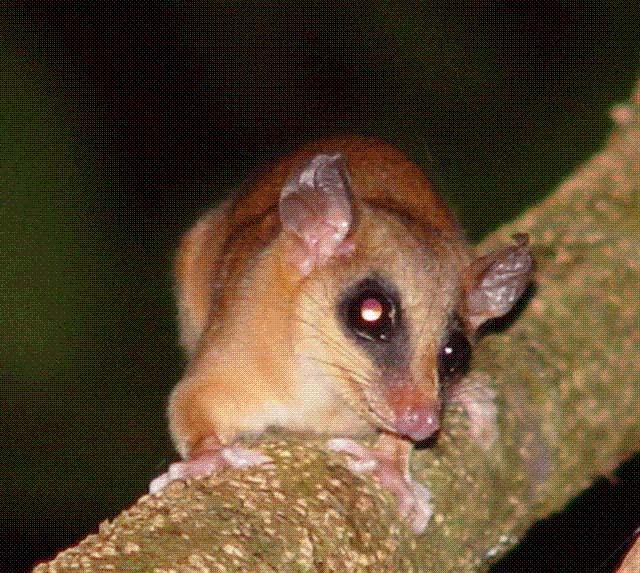

In [9]:
# Actually fetch an image
import shutil
from IPython.display import Image

response = requests.get(urls[0], stream=True)
with open('img.jpg', 'wb') as out_file:
    shutil.copyfileobj(response.raw, out_file)
del response

Image("img.jpg")